### Machine Learning Modeling


#### Machine Learning Goals
- Build a machine to predict if a patient have a heart disease or not

### Import Common Package

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Getting Data

In [44]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
heartdesc=[]
for i in df.columns:
    heartdesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum())/(len(df))) *100),2),
        df[i].nunique(),
        df[i].unique(),
    ])
    
pd.DataFrame(data= heartdesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'NUnique', 
                'Unique Sample'
                
            ])

,Data Features,Data Type,Null,Null Percentage,NUnique,Unique Sample
0,age,int64,0,0.0,41,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
1,sex,int64,0,0.0,2,"[1, 0]"
2,cp,int64,0,0.0,4,"[3, 2, 1, 0]"
3,trestbps,int64,0,0.0,49,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
4,chol,int64,0,0.0,152,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
5,fbs,int64,0,0.0,2,"[1, 0]"
6,restecg,int64,0,0.0,3,"[0, 1, 2]"
7,thalach,int64,0,0.0,91,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
8,exang,int64,0,0.0,2,"[0, 1]"
9,oldpeak,float64,0,0.0,40,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Checking missing value and outliers

In [48]:
df.isna().sum()
### No missing value we can move one

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

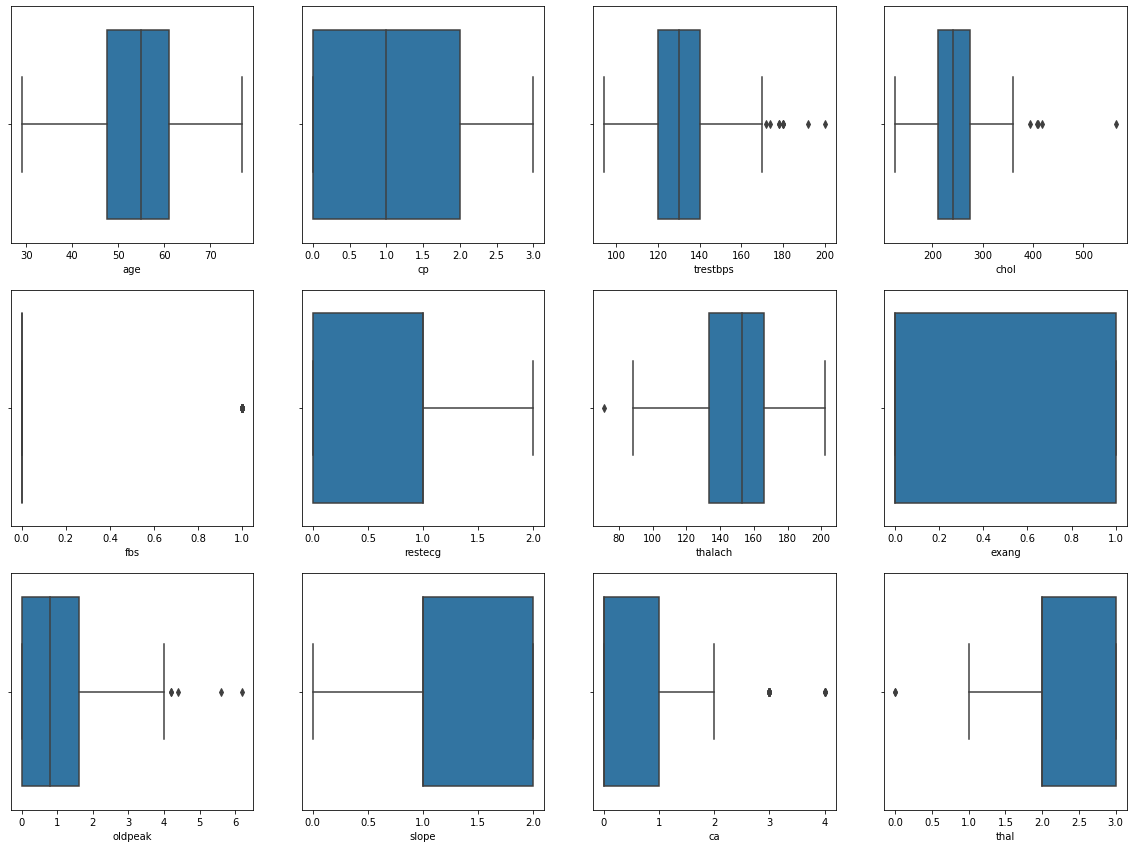

In [49]:
df_describe = df.drop(columns = ['sex','target'])
plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.describe().columns:
    plt.subplot(4,4,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()

### There are some datas with outliers, such as restbps, chol, thalach, oldpeak, ca and thal
### However we going to leave that since its not too many and wont bother the analysis

### Data pre Processing  and Feature Engineering and Selection

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
### Bining Age to groups
bin_age = [25, 45, 65, 75, df['age'].max()]
label_age = [0, 1, 2, 3]

df['Age Group'] = pd.cut(df['age'], bins = bin_age, labels = label_age)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [52]:
bin_bps = [90,119, 139, df['trestbps'].max()]
label_bps = [0, 1, 2]

df['BP Group'] = pd.cut(df['trestbps'], bins = bin_bps, labels = label_bps)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1


In [53]:
bin_chol = [100,200, 239, df['chol'].max()]
label_chol = [0,1,2]

df['Cholestrol Level'] = pd.cut(df['chol'], bins = bin_chol, labels = label_chol)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group,Cholestrol Level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1,2


In [54]:
bin_hr = [50,100, df['thalach'].max()]
label_hr = [0,1]

df['Heart Rate'] = pd.cut(df['thalach'], bins = bin_hr, labels = label_hr)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group,Cholestrol Level,Heart Rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,2,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1,2,1


### Checking Correlation

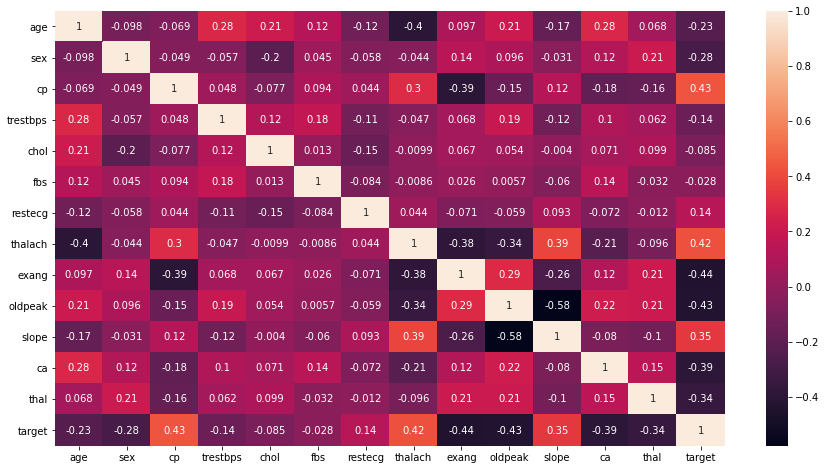

In [55]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [56]:
correlation = df.corr()
correlation['target'].sort_values(ascending = False)[1:]

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

### Checking Association Using Cramer's V

In [57]:
import scipy.stats as ss
from collections import Counter

In [58]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [59]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age Group',
       'BP Group', 'Cholestrol Level', 'Heart Rate'],
      dtype='object')

In [60]:
assoc_cramers = []
for i in df.columns:
    assoc = round((cramers_v(df['target'], df[i])),2)
    assoc_cramers.append(assoc)

In [61]:
data = pd.DataFrame(data= [assoc_cramers], columns=df.columns, index=['target'])

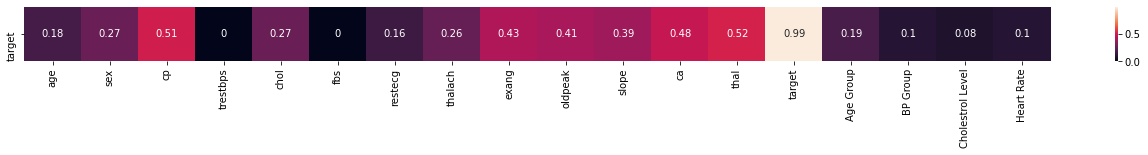

In [62]:
plt.figure(figsize=(23, 1))
sns.heatmap(data, annot=True)
plt.show()

In [63]:
df_selection =  df.drop(columns =['age','trestbps', 'chol','thalach'])

In [73]:
df_selection['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [65]:
X = df_selection.drop(columns='target')
y = df['target']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =.80, stratify = y, random_state =42)

### BASE MODEL

#### Logistic Regression

In [67]:
logreg =  LogisticRegression()

In [68]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [69]:
ypredlog=logreg.predict(X_test)

In [70]:
acc_logreg = accuracy_score(y_test, ypredlog)
recall_logreg = recall_score(y_test, ypredlog)
prec_logreg = precision_score(y_test, ypredlog)
f1_logreg = f1_score(y_test, ypredlog)
print(classification_report(y_test, ypredlog))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



In [71]:
cmlogreg =  confusion_matrix(y_test,ypredlog, labels =[1,0])

In [72]:
df_logreg = pd.DataFrame(data = cmlogreg , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_logreg

,Prediksi 1,Prediksi 0
Aktual 1,31,2
Aktual 0,10,18


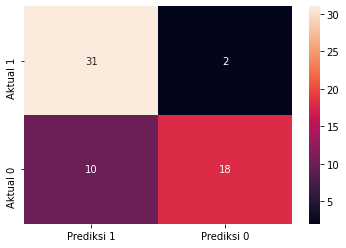

In [90]:
sns.heatmap(df_logreg, annot = True)
plt.show()

In [74]:
DTbase = DecisionTreeClassifier()

In [75]:
DTbase.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
ypredDT = DTbase.predict(X_test)

In [91]:
acc_DT = accuracy_score(y_test, ypredDT)
recall_DT = recall_score(y_test, ypredDT)
prec_DT = precision_score(y_test, ypredDT)
f1_DT = f1_score(y_test, ypredDT)
print(classification_report(y_test, ypredDT))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [79]:
cmDT =  confusion_matrix(y_test,ypredDT, labels =[1,0])

In [80]:
df_DT = pd.DataFrame(data = cmDT , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_DT

,Prediksi 1,Prediksi 0
Aktual 1,25,8
Aktual 0,9,19


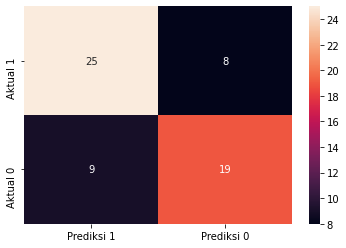

In [89]:
sns.heatmap(df_DT, annot = True)
plt.show()

In [81]:
rfbase =  RandomForestClassifier()

In [82]:
rfbase.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
ypredrf = rfbase.predict(X_test)

In [84]:
acc_rf = accuracy_score(y_test, ypredrf)
recall_rf = recall_score(y_test, ypredrf)
prec_rf = precision_score(y_test, ypredrf)
f1_rf = f1_score(y_test, ypredrf)
print(classification_report(y_test, ypredrf))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



In [85]:
cmrf =  confusion_matrix(y_test,ypredrf, labels =[1,0])

In [86]:
df_rf = pd.DataFrame(data = cmrf , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_rf

,Prediksi 1,Prediksi 0
Aktual 1,31,2
Aktual 0,11,17


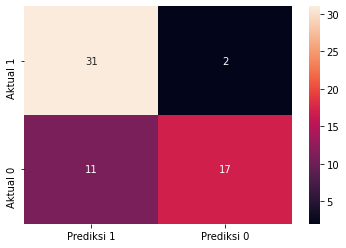

In [88]:
sns.heatmap(df_rf, annot = True)
plt.show()

In [92]:
eva_mat = {
    "LogisticReg": [acc_logreg,prec_logreg,recall_logreg,f1_logreg],
    "DT": [acc_DT, prec_DT, recall_DT, f1_DT],
    "RandomForest" : [acc_rf, prec_rf, recall_rf, f1_rf]
    }

eva = pd.DataFrame(data = eva_mat, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva

,LogisticReg,DT,RandomForest
Accuracy,0.803279,0.721311,0.786885
Precision,0.756098,0.735294,0.738095
Recall,0.939394,0.757576,0.939394
F1-Score,0.837838,0.746269,0.826667


In [ ]:
### From the base model Logistic Regression have the best accuracy score
### We are going to focus on accuracy since the data is balance.

#### Hyperparameter Tuning

In [93]:
logregtuned = LogisticRegression()
paramLR = {'penalty':['l2','elasticnet'],
           'C':[1, 0.5, 0.1, 5, 9],
           "class_weight" : [True, False]}

In [105]:
modelLRtuned = GridSearchCV(estimator=logregtuned, param_grid=paramLR, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')

In [106]:
modelLRtuned.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'class_weight': [True, False],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [107]:
logreg_tuned = modelLRtuned.best_estimator_

In [108]:
ytunedlogreg = logreg_tuned.predict(X_test)

In [109]:
cmlogregtuned=confusion_matrix(y_test,ytunedlogreg,labels=[1,0])
cmlogregtuned

array([[31,  2],
       [10, 18]])

In [110]:
acclrtuned = accuracy_score(y_test, ytunedlogreg)
preclrtuned = precision_score(y_test, ytunedlogreg)
reclrtuned = recall_score(y_test, ytunedlogreg)
f1lrtuned = f1_score(y_test,ytunedlogreg)

print(classification_report(y_test, ytunedlogreg))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



In [111]:
dflogregtuned = pd.DataFrame(data = cmlogregtuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
dflogregtuned

,Prediksi 1,Prediksi 0
Aktual 1,31,2
Aktual 0,10,18


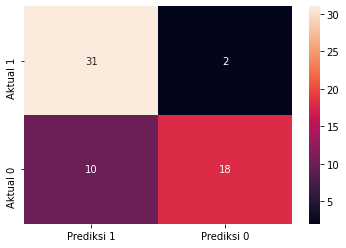

In [112]:
sns.heatmap(dflogregtuned, annot = True)

In [120]:
DTtuning = DecisionTreeClassifier()
paramDT = {
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
}

In [136]:
modelDTtuned = GridSearchCV(estimator = DTtuning, param_grid= paramDT, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')

In [137]:
modelDTtuned.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    4.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 0.06, 3, 5],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='accuracy', verbose=1)

In [138]:
DT_tuned = modelDTtuned.best_estimator_

In [139]:
ytunedDT = DT_tuned.predict(X_test)

In [140]:
cmDTtuned=confusion_matrix(y_test,ytunedDT,labels=[1,0])
cmDTtuned

array([[29,  4],
       [ 6, 22]])

In [146]:
accDTtuned = accuracy_score(y_test, ytunedDT)
precDTtuned = precision_score(y_test, ytunedDT)
recDTtuned = recall_score(y_test, ytunedDT)
f1DTtuned = f1_score(y_test,ytunedDT)

print(classification_report(y_test, ytunedDT))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [142]:
dfDTtuned= pd.DataFrame(data = cmDTtuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
dfDTtuned

,Prediksi 1,Prediksi 0
Aktual 1,29,4
Aktual 0,6,22


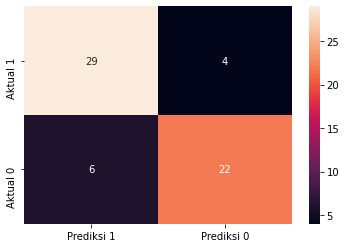

In [152]:
sns.heatmap(dfDTtuned, annot = True)

In [143]:
RFtuning = RandomForestClassifier()
paramDT = {
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
}

In [144]:
modelrftuned = GridSearchCV (estimator= RFtuning, param_grid= paramDT, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')

In [145]:
modelrftuned.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 0.06, 3, 5],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='accuracy', verbose=1)

In [147]:
RF_tuned =modelrftuned.best_estimator_

In [148]:
ytunedRF = RF_tuned.predict(X_test)

In [149]:
cmRFtuned=confusion_matrix(y_test,ytunedRF,labels=[1,0])
cmRFtuned

array([[32,  1],
       [ 9, 19]])

In [151]:
accRFtuned = accuracy_score(y_test, ytunedRF)
precRFtuned = precision_score(y_test, ytunedRF)
recRFtuned = recall_score(y_test, ytunedRF)
f1RFtuned = f1_score(y_test,ytunedRF)

print(classification_report(y_test, ytunedRF))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [153]:
dfRFtuned= pd.DataFrame(data = cmRFtuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
dfRFtuned

,Prediksi 1,Prediksi 0
Aktual 1,32,1
Aktual 0,9,19


In [157]:
eva_mat_tuned = {
    "LogisticReg": [acclrtuned, preclrtuned, reclrtuned, f1lrtuned],
    "DecisionTree": [accDTtuned, precDTtuned, recDTtuned, f1DTtuned],
    "RandomForest" : [accRFtuned, precRFtuned, recRFtuned, f1RFtuned]
}
eva_tuned = pd.DataFrame(data = eva_mat_tuned, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_tuned

,LogisticReg,DecisionTree,RandomForest
Accuracy,0.803279,0.836066,0.836066
Precision,0.756098,0.828571,0.780488
Recall,0.939394,0.878788,0.969697
F1-Score,0.837838,0.852941,0.864865


- Best accuracy and recall score is Random Forest, thus we going to choose Random Forest as our model

In [159]:
import joblib

In [161]:
joblib.dump(modelrftuned, 'Heart Disease Predictor')

['Heart Disease Predictor']